# Overview:

The data consists of the following: Training set (train.csv) and Test set (test.csv).

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [141]:
data= pd.read_csv('train_and_test2.csv')
print (data.shape)
data.head()

(1309, 28)


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [133]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
zero           1309 non-null int64
zero.1         1309 non-null int64
zero.2         1309 non-null int64
zero.3         1309 non-null int64
zero.4         1309 non-null int64
zero.5         1309 non-null int64
zero.6         1309 non-null int64
Parch          1309 non-null int64
zero.7         1309 non-null int64
zero.8         1309 non-null int64
zero.9         1309 non-null int64
zero.10        1309 non-null int64
zero.11        1309 non-null int64
zero.12        1309 non-null int64
zero.13        1309 non-null int64
zero.14        1309 non-null int64
Pclass         1309 non-null int64
zero.15        1309 non-null int64
zero.16        1309 non-null int64
Embarked       1307 non-null float64
zero.17     

In [134]:
x_data = data.drop(columns=['2urvived'])
y_data = data['2urvived']

In [135]:
print(x_data.shape)
x_data.head()

(1309, 27)


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,0
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0


In [144]:
print(y_data.shape)
y_data.head()

(1309,)


0    0
1    1
2    1
3    1
4    0
Name: 2urvived, dtype: int64

In [136]:
x_data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
dtype: int64

In [138]:
#deleting the null values in embarked column using '.dropna'
mod_x_data = x_data.dropna()
mod_x_data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
dtype: int64

In [142]:
# dropping the indices in y_data as well

missing_index = x_data[x_data.isnull().any(axis=1)].index.tolist()

In [143]:
modify_x = x_data.drop(index=missing_index,axis="rows")

In [95]:
modify_x.shape

(1307, 27)

In [96]:
modify_y = y_data.drop(index=missing_index,axis="rows")

In [97]:
modify_y.shape

(1307,)

In [146]:
from sklearn import preprocessing


#create scaler to scale the x_features
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

#scale numerical_features
scaled_x_features = minmax_scale.fit_transform(modify_x)

#show features
print(scaled_x_features)

[[0.00000000e+00 2.73456094e-01 1.41510576e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.64525994e-04 4.73881999e-01 1.39135735e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.52905199e-03 3.23562570e-01 1.54685698e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.98470948e-01 4.80145309e-01 1.41510576e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99235474e-01 3.48615809e-01 1.57125536e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.48615809e-01 4.36404952e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [148]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(scaled_x_features, modify_y, test_size=0.25, random_state=0)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(980, 27)
(980,)
(327, 27)
(327,)


In [150]:
#instance the model with defaulted parameters

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

#fitting the model
model = logisticRegr.fit(X_train, y_train)
 
#predict on the test data (x_test)
predictions = logisticRegr.predict(X_test)

In [151]:
#get the accuracy of the model
score = model.score(X_test, y_test)
print (score)

0.8654434250764526


In [153]:
#evalute the score we obtained in this classification challenge
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score,precision_score

f1_score(y_test, predictions)

0.7105263157894737

In [154]:
recall_score(y_test, predictions)

0.6352941176470588

In [155]:
precision_score(y_test, predictions)

0.8059701492537313

             correct  not correct
correct          229           13
not correct       31           54


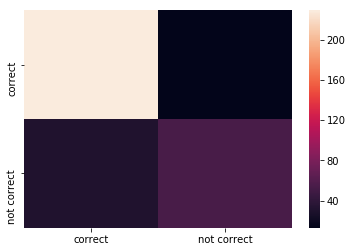

In [164]:
matrix = confusion_matrix(y_test, predictions)
Frame = pd.DataFrame(matrix,index = ["correct","not correct"],columns=["correct","not correct"])
print(Frame)

import seaborn as sns
sns.heatmap(Frame)
plt.show()